# Method of Relaxation

We discretize Laplace's equations in 2 dimensions, using the three point formula in two dimensions

$$ \dfrac{\partial^2 V}{\partial x^2} + \dfrac{\partial^2 V}{\partial y^2} = 0 $$

We discretize the equation in two dimension 

$$ \dfrac{V(x + \Delta x,y) + V(x - \Delta x,y) + V(x,y)}{\Delta x} +\dfrac{V(x, y + \Delta y) + V(x, y - \Delta y) + V(x,y)}{\Delta y}  =  0  $$

Setting $\Delta x = \Delta y$  we get the following equation,

$$ V(x,y) = \dfrac{1}{4}(V(x + \Delta x,y) + V(x - \Delta x,y) + V(x, y + \Delta x) + V(x, y  - \Delta x)) $$

### Some of the numpy functions have been implemented from Mr. pSolver on youtube

like ```np.select()```

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
edge = np.linspace(-1,1,300)
xv, yv = np.meshgrid(edge, edge)

In [7]:
upper_y = edge**2
lower_y, upper_x, lower_x = upper_y, upper_y, upper_y

In [33]:
def pot(p, const, iters):
    l = len(p[0])
    for _ in range(iters):
        for i in range(1,l-1):
            for j in range(1,l-1):
                if not(const[i][j]):
                    p[i][j] = 1/4 * (p[i+1][j] + p[i-1][j] + p[i][j+1] + p[i][j-1])
    return p

In [42]:
iterations = 1000
p = np.zeros((300,300))
FIXED = p != 0
p[0,:]= lower_y
p[-1,:]= upper_y
p[:,0]= lower_x
p[:,-1]= upper_x

p1 = pot(p,FIXED, iterations)

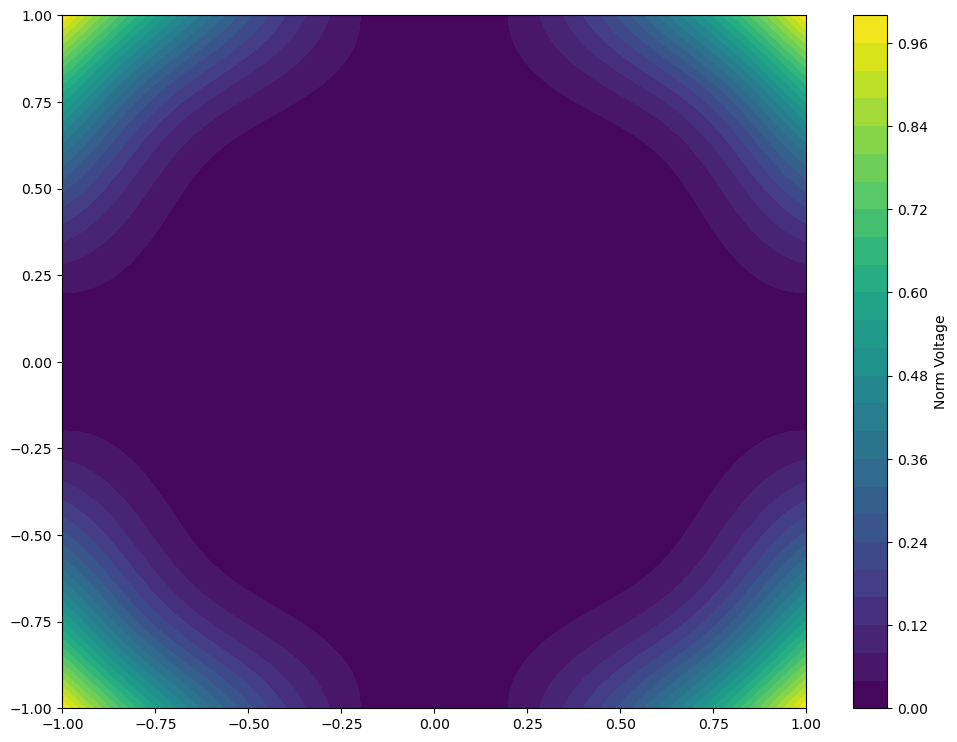

In [43]:
fig, axes = plt.subplots(figsize = (12,9), nrows = 1, ncols = 1)
potplot = axes.contourf(xv, yv, p1, 30)
fig.colorbar(potplot, label = "Norm Voltage")

In [30]:
def fixed(x, y):
    return np.select([(x > -0.25) * (x < 0.25) * (y < 0.25) * (y > -0.25), (x >= 0.25)+(x <= -0.25)+(y >= 0.25)+(y <= -0.25)],(1,0))

In [31]:
block = fixed(xv, yv)
block_bool = block!=0

In [34]:
p = np.zeros((300,300))
p[0,:]= lower_y
p[-1,:]= upper_y
p[:,0]= lower_x
p[:,-1]= upper_x
p[block_bool] = block[block_bool]
p1 = pot(p, block_bool, iterations)

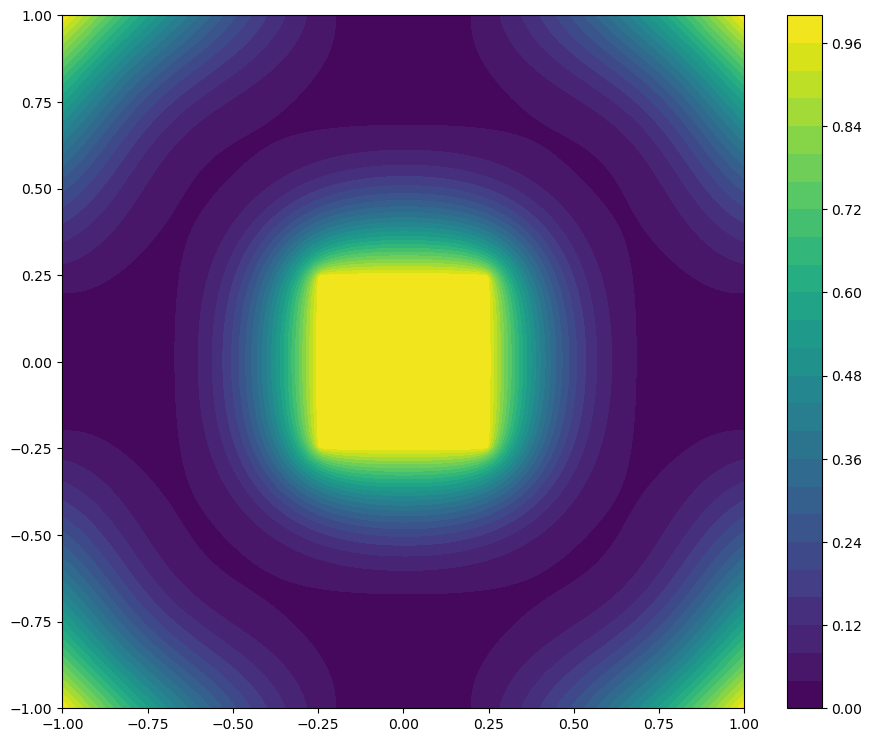

In [35]:
fig, axes = plt.subplots(figsize = (11,9), nrows = 1, ncols = 1)
potplot = axes.contourf(xv, yv, p1, 30)
fig.colorbar(potplot)